## Assignment 2

In [1]:
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### 1. 
As a part of a software for modelling defects on fabricated silicon wafers you need to
simulate a uniform distribution inside a circle. (You can choose the radius to be 𝑅 = 1.)

* In all that follows, R=1

#### A.

First implement this using the rejection method by thinking of the circle being
enveloped by a square. Generate 2000 points (𝑥, 𝑦) and plot them.

Draw pairs (x,y) from uniform distribution, and reject all those for whom $x^2+y^2>1$:

In [2]:
sample_reject = np.zeros([2000,2]) # col1 for x, col2 for y - initialization
samples = 0

while samples<2000:
    
    x=rnd.uniform(-1,1)
    y=rnd.uniform(-1,1)
    if(x**2+y**2<=1):
        sample_reject[samples,0], sample_reject[samples,1] = x, y
        samples += 1
    

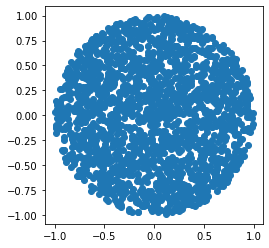

In [3]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
plt.scatter(sample_reject[:,0],sample_reject[:,1])
ax1.set_aspect('equal')

#### B.
You want to make the simulation computationally more effective and not to reject
any points, so you generate random points inside the circle by using polar coordinates, 𝑥 =
𝑟cos(2𝜋𝜃), 𝑦 = 𝑟sin(2𝜋𝜃), and drawing 𝑟 and 𝜃 from uniform distributions. Generate
2000 points (𝑥, 𝑦) and plot them. Explain the outcome.

Let's first draw 2000 pairs (x,y) from uniform: 

In [4]:
sample_seed = np.zeros([2000,2]) # r in [0,1], theta in [0,2pi]
for i in range(2000):
    sample_seed[i,0], sample_seed[i, 1] = rnd.uniform(0,1), rnd.uniform(0,1)


Then let's define lambda expressions for x, y:

In [5]:
x = lambda r,theta: r*np.cos(2*math.pi*theta)
y = lambda r,theta: r*np.sin(2*math.pi*theta)

Using those expressions, and the "seed" uniform sample, let's make the transform:

In [6]:
sample_polar = np.stack([x(sample_seed[:,0],sample_seed[:,1]),y(sample_seed[:,0],sample_seed[:,1])],-1)

...and plot the results

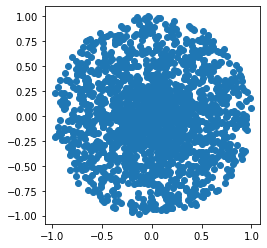

In [7]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
plt.scatter(sample_polar[:,0],sample_polar[:,1])
ax2.set_aspect('equal')

The density is clearly higher the closer we get to the center. To figure out the reason, imagine a uniform circle of constant radius, and an area of A. The area corresponds to probability mass, and so we know $F(r)\propto \pi r^2 => p(r)\propto 2\pi r$. So the number of samples for a fixed interval $[r,r+dr]$ should grow as we get further from the center. However, when drawing $r$ from an uniform distribution, all values of $r$ are equally likely; this results in a denser sample near the center.

Optionally, this can be visualized by dividing the area to "slices" of size $2\pi r dr$. If you draw approximately same number of points for each slice, naturally the slices with larger values of $r$ will have sparser cover over the slice (points are divided over a larger area). And if we want an uniform sample over the circle, we need the average distance between points to be constant, which is not the case here. To correct for this, we need the number of samples to grow linearly with r (for constant density).

To remedy this, we need to somehow correct for this change in density as a function of $r$. The next task addresses this.

#### C.

Simulate the circular uniform distribution by the inverse distribution method.
Generate (𝑥, 𝑦) from polar coordinates again drawing 𝜃 from uniform distribution but
applying a proper transformation for the radius 𝑟 ∈ (0, 𝑅).

Just as a side note, the constant term is also easy to reason from the fact, that with $R=1$ the area of the circle is $\pi R^2=\pi$, and if we need it to be a probability, the constant has to be $1/\pi$. But, I will solve the general case just to be sure:

So, given a density $p(r)=C2\pi r$, we get $$C2\pi\int_{0}^{R}rdr=C2\pi\times \dfrac{1}{2}R^2=1$$

$=> C=\dfrac{1}{\pi R^2}$ which gives us $p(r)=2*\dfrac{r}{R^2}$, and CDF:

$$F(r)=\dfrac{2}{R^2}\int_{0}^{r}\tau d\tau=\dfrac{r^2}{R^2}$$

And this let's us invert the following: $\mathcal{u}=F(r)=\dfrac{r^2}{R^2}$ $=> r=R\sqrt u$

So all we need to do, is take square roots of our uniforms, and scale them with the radius (in our case $R=1$). I am using the same seed sample from previous, to better show the effect:

In [8]:
r = np.sqrt(sample_seed[:,0])
sample_transformed = np.stack([x(r,sample_seed[:,1]), y(r,sample_seed[:,1])],-1)

... And the plot:

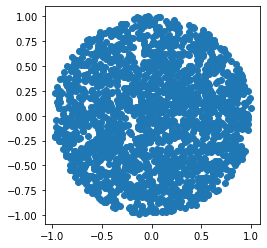

In [9]:
fig3=plt.figure()
ax3=fig3.add_subplot(111)
plt.scatter(sample_transformed[:,0],sample_transformed[:,1])
ax3.set_aspect('equal')

Vóila! 

Seems to be working, as it should. And the difference to B is of course, that by transforming the radius, we now recognize the further we move from the center, the more samples we need (for some interval $[r,r+dr]$). The more explicit explanation was given already after B.

### 2.

 Power-law distributions are common in nature and society. For example, when brittle
material (e.g. rock) fragments in two dimensions such that the amount of energy (e.g. in
impact) used is barely sufficient to cause the whole material volume to fracture, the mass
distribution of fragments, that is, the number of fragments # of mass 𝑚, is of the
logarithmic (power-law) form #$(𝑚) \propto 𝑚^{-3/2}, \>\>(> 0)$.

#### A.

... to keep
things simple just simulate the distribution (CDF) by the inverse distribution method.

#### NOTE: For what follows, I am using notation $f(x)=CAx^{-\alpha}$ and $\alpha=\dfrac{3}{2}$ and $x_{min}=1$

First, let's figure out the constant using the pdf:

$$f(x)=CAx^{-\alpha}$$

$$=>CA\int_{x_{min}}^{\infty}\tau d\tau=\dfrac{CA}{(\alpha -1)}\biggr\rvert_{x_{min}}^{\infty}\tau^{1-\alpha}
=\dfrac{CA}{(\alpha -1)}x_{min}^{1-\alpha}$$

since $\alpha>1$. So, the constant term is:

$$
C=\dfrac{\alpha-1}{A}x_{min}^{\alpha-1}
$$

and the density is:

$$
f(x)=CAx^{-\alpha}=(\alpha-1)x_{min}^{\alpha-1} x^{-\alpha}
$$

Or, if we ackowledge $x_{min}=1$:
$$
f(x)=(\alpha-1)x^{-\alpha}
$$

And the CDF:
$$
F(x)=\int_{x_min}^{x}f(\tau)d\tau=(\alpha-1)x_{min}^{\alpha-1}\int_{x_{min}}^{x}\tau^{-\alpha}d\tau
$$

$$
=x_{min}^{\alpha-1}\biggr\rvert_{x_{min}}^{x}\tau^{1-\alpha}
=-x_{min}^{\alpha-1}x^{1-\alpha} + x_{min}^{\alpha-1}x_{min}^{1-\alpha}
=1-x_{min}^{\alpha-1}x^{1-\alpha}
$$

So, we got:
$$
y=F(x)=1-x_{min}^{\alpha-1}x^{1-\alpha}
$$

Or, if $x_{min}=1$:
$$
y=F(x)=1-x^{1-\alpha}
$$

which we can invert:
$$
x=x_{min}(1-y)^{-\dfrac{1}{\alpha-1}}
$$

and recalling my convention $\alpha=3/2$, we get:
$$
x=x_{min}(1-y)^{-2}
$$


So, we can draw from $(1-y)^{-2}$. The minimum value just scales the draws, and we don't need to worrie about it here ($x_{min}=1$). Let's draw 100000 uniform samples first:

In [10]:
uni = np.zeros(100000)
for i in range(len(uni)):
    uni[i]=rnd.uniform(0,1)

Then draw from the power-law distribution:

In [11]:
sample_power = (1-uni)**(-2)

#### B.

First, linear histogram with 300 bins (linear binning).
Pyplot histogram returns bincounts and bin edges (constant binwidth of (sample_MAX-sample_MIN)/num_of_bins).

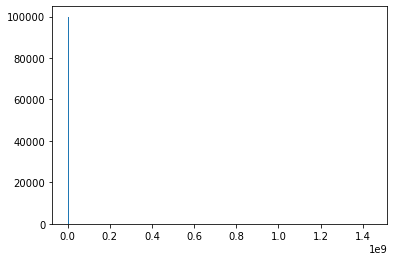

In [12]:
fig5=plt.figure()
ax5=fig5.add_subplot(111)
n1, b1, _ = plt.hist(sample_power, bins=300) #returns bincounts (n) and bin edges (b)

Then we can do the same, but with log scaling the bincounts:

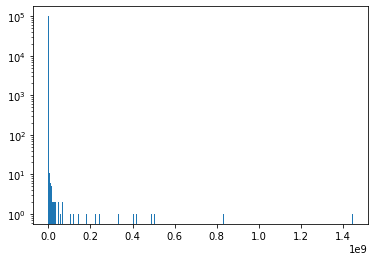

In [13]:
fig6=plt.figure()
ax6=fig6.add_subplot(111)
n2, b2, _ = plt.hist(sample_power, bins=300, log=True) #ignores empty bins

(**extra plot**): Looks a bit more clear, but let's also try making the values logarithmic before binning (this gives a hint if log-binning might work): 

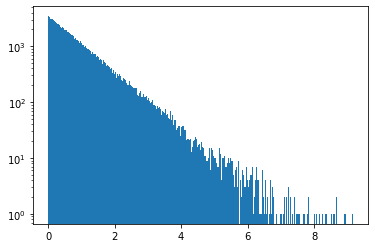

In [14]:
plt.hist(np.log10(sample_power), bins=300, log=True)
plt.show()

#### NOTE: The assignment was not particularly clear on what kinds of plots we needed to make, so I'm including some additional ones as well, just to be sure..1. EDIT: apparently histograms and scatter plots are both ok. I'll use both.

#### linear plot for bin centers vs. bincounts (no log-binning yet). I am not normalizing bincounts, since this gives the full picture just as well:

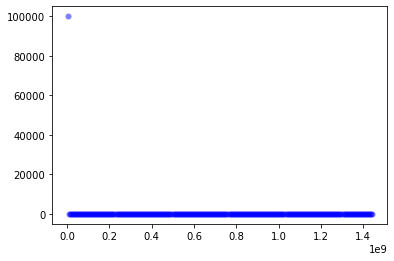

In [15]:
mid_1 = (b1[1:]+b1[:-1])/2 # mid points of bins

fig = plt.figure()
ax = plt.gca()
ax.plot(mid_1 , n1, 'o', alpha=.5, c='blue', markeredgecolor='none')

Pretty much useless, since vast majority of samples are located in the lowest bin. With 300 bins, when min value is ~1 and max value +1B, the binwidths are massive. Therefore the resolution is very poor. Wast majority of bins have no samples at all, and the first bin has +99% of them.

Since the binwidths are constant, there is no reason to plot those agains midpoints.

#### and log-log:

scatter and line plots for same points:

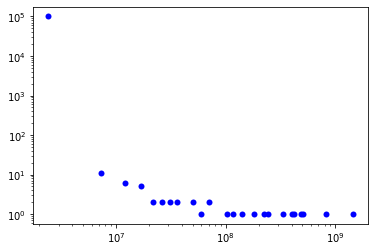

In [16]:
mid_1 = (b1[1:]+b1[:-1])/2 # mid points of bins

fig = plt.figure()
ax = plt.gca()
ax.plot(mid_1 , n1, 'o', c='blue', markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

The problem is not significantly mitigated, although log-scales give a somewhat better view of the sample.

#### C. (log binning)

Let's implement the logarithmic binning. We can use cumsum to transform bin widths to bin edges.
Since minimum x value is 1, we start by appending it to the array:

In [17]:
i = np.array([i for i in range(-100,101)])
w = np.exp(i/10)-np.exp((i-1)/10)  #bin widths
bins=np.cumsum(np.append(1,w)) # since x_min was 1
mid_points=(bins[1:]+bins[:-1])/2

Then, just for ease of use, I'm still using the hist to get bincounts. Hist can take pre-specified bin edges.
Histogram is **linear-linear plot**:

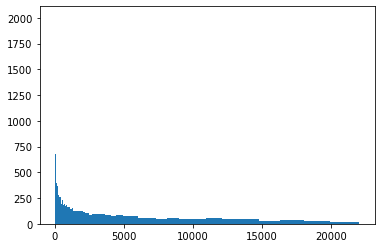

In [18]:
fig6=plt.figure()
ax6=fig6.add_subplot(111)
n, b, _ = plt.hist(sample_power, bins=bins) #returns bincounts (n)

histogram with log(-log) scales (you can test the effect of different scales by un-/commenting the set_scales lines):

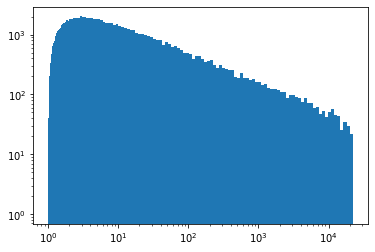

In [19]:
fig7=plt.figure()
ax7=fig7.add_subplot(111)
plt.hist(sample_power, bins=bins)
ax7.set_xscale('log')
ax7.set_yscale('log')

The first bins are very narrow, and widen as the higher values are more sparse.

 #### Then finally, for log-binned data, mid points vs. bincounts (relative n/width).

linear-linear scatter plot (same points):

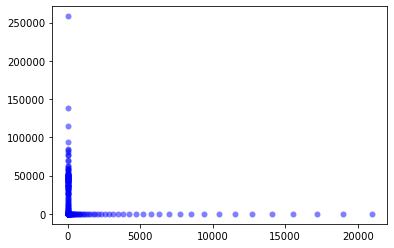

In [20]:
fig = plt.figure()
ax = plt.gca()
ax.plot(mid_points ,n/w, 'o', c='blue', alpha=0.5, markeredgecolor='none')

log-log scatter plot:

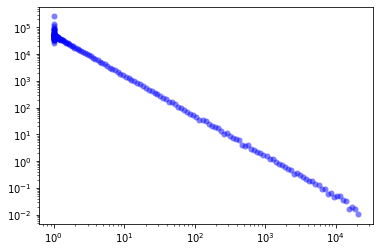

In [21]:
fig = plt.figure()
ax = plt.gca()
ax.plot(mid_points ,n/w, 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

Now the bins are filled much more evenly, as the binwidths are adjusting for the sparsity of higher values. Specifically, bins are very narrow for low values, and get wider for higher values. This allows the bins to be filled more evenly.
And log-log axis correspond to the increased scale.

**(Extra plot)** First, let's plot binwidths vs. bin centers (mid points), as was done in the lecture materials. First linear scale:

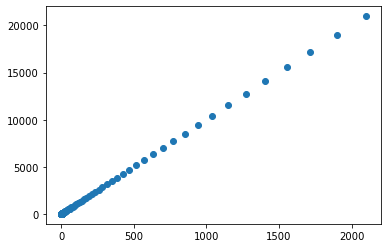

In [22]:
plt.scatter(w,mid_points)

**(Extra plot)** Then on log-log scale. This shows how the mid-points are evenly placed, relative to (assumed) sparsity of data at higher values:

(0.1, 10000)

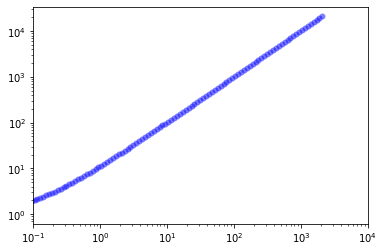

In [23]:
fig = plt.figure()
ax = plt.gca()
ax.plot(w ,mid_points, 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xmin=10**-1,xmax=10**4)  # take these lims of to see the behaviour as binwidth gets smaller